In [1]:
custom_lib <- "/kaggle/working/KO"  
default_lib <- .libPaths()[1] 
#
packages <- list.dirs(custom_lib, full.names = TRUE, recursive = FALSE)

# move packages from custom to default library path
for (pkg in packages) {
  pkg_name <- basename(pkg)  
  target_path <- file.path(default_lib, pkg_name)
  
  # check if the package already exists in the default path
  if (!dir.exists(target_path)) {
    file.copy(pkg, default_lib, recursive = TRUE)
  } else {
    message(paste("package already exists in default library:", pkg_name))
  }
}
print('-----------------All packages are moved----------------------')

[1] "-----------------All packages are moved----------------------"


In [2]:
custom_lib <- "/kaggle/input/library-data/my_r_libs"  
default_lib <- .libPaths()[1] 

packages <- list.dirs(custom_lib, full.names = TRUE, recursive = FALSE)

# move packages from custom to default library path
for (pkg in packages) {
  pkg_name <- basename(pkg)  
  target_path <- file.path(default_lib, pkg_name)
  
  # check if the package already exists in the default path
  if (!dir.exists(target_path)) {
    file.copy(pkg, default_lib, recursive = TRUE)
  } else {
    message(paste("package already exists in default library:", pkg_name))
  }
}
print('-----------------All packages are moved----------------------')

package already exists in default library: bslib

package already exists in default library: digest

package already exists in default library: e1071

package already exists in default library: evaluate

package already exists in default library: knitr

package already exists in default library: KODAMA

package already exists in default library: KODAMAextra

package already exists in default library: openssl

package already exists in default library: Rcpp

package already exists in default library: RcppArmadillo

package already exists in default library: RcppEigen

package already exists in default library: reticulate

package already exists in default library: rmarkdown

package already exists in default library: RSpectra

package already exists in default library: tinytex

package already exists in default library: uuid

package already exists in default library: withr

package already exists in default library: xfun

package already exists in default library: yaml



[1] "-----------------All packages are moved----------------------"


In [3]:
# BiocManager::install('STexampleData')
# library(STexampleData)
library(ggspavis)
library(ggplot2)
library(scater)
library(scran)
library(igraph)
library(pheatmap)
library(ggExtra)
library(nnSVG)
library(scater)
library(scran)
library(scry)
library(SPARK)
library(harmony)
library(Seurat)
library(spatialLIBD)
library(KODAMAextra)
library(mclust)
library(slingshot)
library(irlba)
library(dplyr)
library(hdf5r)
library(Matrix)
library(Seurat)
library(ggplot2)
library(patchwork)
library(dplyr)


Loading required package: ggplot2

Registered S3 method overwritten by 'ggside':
  method from   
  +.gg   ggplot2

Loading required package: SingleCellExperiment

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, ro

In [69]:
library(Seurat)
library(KODAMA)
library(KODAMAextra)
library(SPARK)


In [7]:
clusters_colors=c('#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b',
       '#e377c2', '#7f7f7f', '#bcbd22', '#17becf')

In [94]:
matrix=Read10X_h5('/kaggle/working/A1/A1_filtered_feature_bc_matrix.h5')

In [95]:
img=Read10X_Image('/kaggle/working/A1/spatial')

In [96]:
st <- CreateSeuratObject(counts = matrix, assay = "Spatial")

In [97]:
st@images$spatial <- img


In [98]:
dim(st)

[1] 36601  1333

In [99]:
head(st@meta.data)

,orig.ident,nCount_Spatial,nFeature_Spatial
,<fct>,<dbl>,<int>
AAACCGGGTAGGTACC-1,SeuratProject,5853,2114
AAACCTCATGAAGTTG-1,SeuratProject,2550,1279
AAACGAGACGGTTGAT-1,SeuratProject,452,364
AAACTGCTGGCTCCAA-1,SeuratProject,654,455
AAAGACTGGGCGCTTT-1,SeuratProject,11713,3202
AAAGGCTCTCGCGCCG-1,SeuratProject,1336,665


# Qc

In [100]:
st$log10GenesPerUMI <- log10(st$nFeature_Spatial) / log10(st$nCount_Spatial)

In [101]:
st$mitoRatio <- PercentageFeatureSet(object = st, pattern = "^MT-")


In [102]:
st$mitoRatio <- st@meta.data$mitoRatio / 100

In [103]:
head(st@meta.data)

,orig.ident,nCount_Spatial,nFeature_Spatial,log10GenesPerUMI,mitoRatio
,<fct>,<dbl>,<int>,<dbl>,<dbl>
AAACCGGGTAGGTACC-1,SeuratProject,5853,2114,0.8826044,0.01674355
AAACCTCATGAAGTTG-1,SeuratProject,2550,1279,0.9120311,0.02156863
AAACGAGACGGTTGAT-1,SeuratProject,452,364,0.9645830,0.01769912
AAACTGCTGGCTCCAA-1,SeuratProject,654,455,0.9440376,0.02752294
AAAGACTGGGCGCTTT-1,SeuratProject,11713,3202,0.8615648,0.01092803
AAAGGCTCTCGCGCCG-1,SeuratProject,1336,665,0.9030699,0.08008982


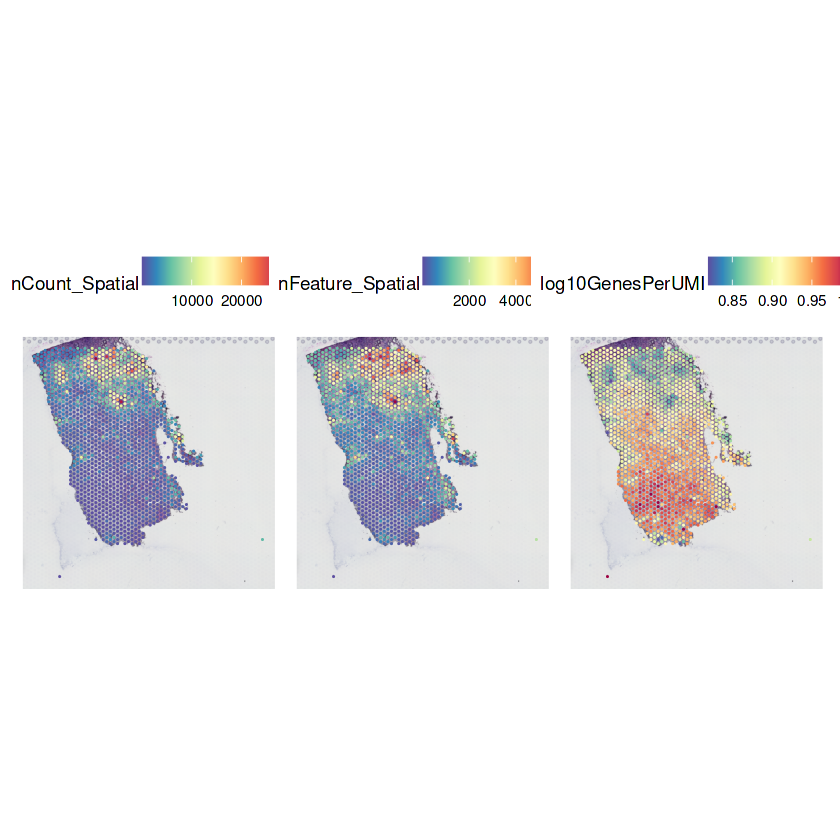

In [104]:
SpatialFeaturePlot(st, features=c('nCount_Spatial','nFeature_Spatial','log10GenesPerUMI'))

Warning message:
“Default search for "data" layer in "Spatial" assay yielded no results; utilizing "counts" layer instead.”


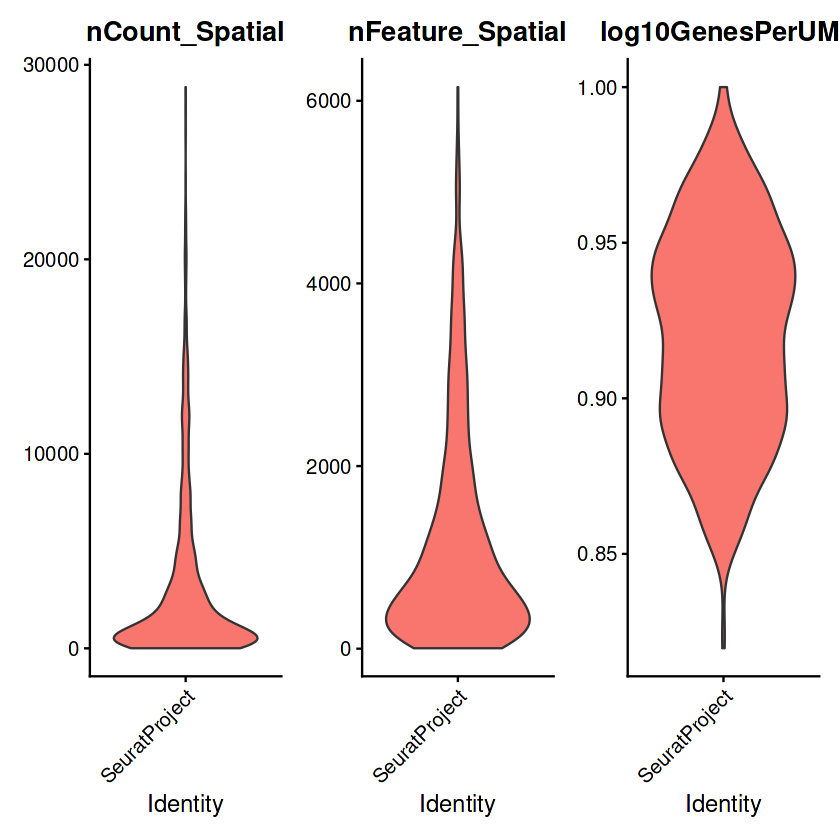

In [105]:
# Violin plot for nCount_Spatial, nFeature_Spatial, log10GenesPerUMI, and mitoRatio
VlnPlot(st, features = c("nCount_Spatial", "nFeature_Spatial", "log10GenesPerUMI"), pt.size = 0)


In [56]:

# # Output a logical vector for every gene on whether the more than zero counts per cell
# # Extract counts
# counts <- GetAssayData(object = filtered_seurat, slot = "counts")

# # Output a logical vector for every gene on whether the more than zero counts per cell
# nonzero <- counts > 0

# # Sums all TRUE values and returns TRUE if more than 10 TRUE values per gene
# keep_genes <- Matrix::rowSums(nonzero) >= 10

# # Only keeping those genes expressed in more than 10 cells
# filtered_counts <- counts[keep_genes, ]

# # Reassign to filtered Seurat object
# filtered_seurat <- CreateSeuratObject(filtered_counts, meta.data = filtered_seurat@meta.data)

In [62]:
st@assays

$Spatial
Assay (v5) data with 36601 features for 1333 cells
First 10 features:
 MIR1302-2HG, FAM138A, OR4F5, AL627309.1, AL627309.3, AL627309.2,
AL627309.5, AL627309.4, AP006222.2, AL732372.1 
Layers:
 counts, data 


In [106]:
SCTransform(st, assay ='Spatial')

Running SCTransform on assay: Spatial

Running SCTransform on layer: counts

vst.flavor='v2' set. Using model with fixed slope and excluding poisson genes.

`vst.flavor` is set to 'v2' but could not find glmGamPoi installed.
Please install the glmGamPoi package for much faster estimation.
--------------------------------------------
install.packages('BiocManager')
BiocManager::install('glmGamPoi')
--------------------------------------------
Falling back to native (slower) implementation.


Variance stabilizing transformation of count matrix of size 14874 by 1333

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 1333 cells

Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trac

An object of class Seurat 
51475 features across 1333 samples within 2 assays 
Active assay: SCT (14874 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: Spatial
 1 spatial field of view present: spatial

In [108]:
st= NormalizeData(st)

Normalizing layer: counts



In [109]:
st <- FindVariableFeatures(st)
st <- ScaleData(st)

Finding variable features for layer counts

Centering and scaling data matrix



In [110]:
st <- RunPCA(st)


PC_ 1 
Positive:  IGLC7, JCHAIN, LINC00513, VIPR2, FRMD1, AC005009.2, ARHGAP5-AS1, AC126178.1, DNAH2, AL450467.1 
	   AC107027.3, CENPI, AC012443.2, TDGF1, GSTO2, KNDC1, IGHD, AICDA, DOK6, ALKAL2 
	   PDZRN4, CHRNA3, ATP8A2, ASTN1, KIAA0895, PCSK4, LINC00526, IGLV1-47, DARS-AS1, PTENP1-AS 
Negative:  IFI30, COX6B1, HLA-DRB1, APOC1, KRT19, CAPG, NDUFB11, NDUFA1, APOE, RPS27A 
	   FN1, TFF3, RPL22, PPIA, CD52, LYZ, COX6C, SELENOW, FTH1, KRT81 
	   HLA-DQA1, CHCHD2, COX6A1, CXCL9, MT2A, KRT7, NUPR1, YWHAZ, PSME1, CCL5 
PC_ 2 
Positive:  KLK5, ST8SIA6-AS1, PROM1, CEACAM6, CRISP3, KRT19, ATP1A4, RIPK4, ELF3, PRSS8 
	   SOX11, SHROOM3, CXADR, MIR205HG, SLC44A4, SMIM22, CALML5, MAL2, CLDN7, S100A14 
	   KRT7, PDZK1IP1, CLDN3, GABRP, MUCL1, SPDEF, CLDN4, TFF3, KRT18, NANOS1 
Negative:  DEPP1, C11orf96, RPS27A, FABP4, IFITM1, SPARCL1, EPAS1, GPX3, CCL19, LTB 
	   ADH1B, ACKR1, HLA-DRB1, TRBC1, GPD1, MYH11, RPS4X, TIMP4, GNG11, MCAM 
	   CLEC14A, G0S2, PI16, ID1, ADAMTS1, LIPE, CD36, CIDEC, PLIN

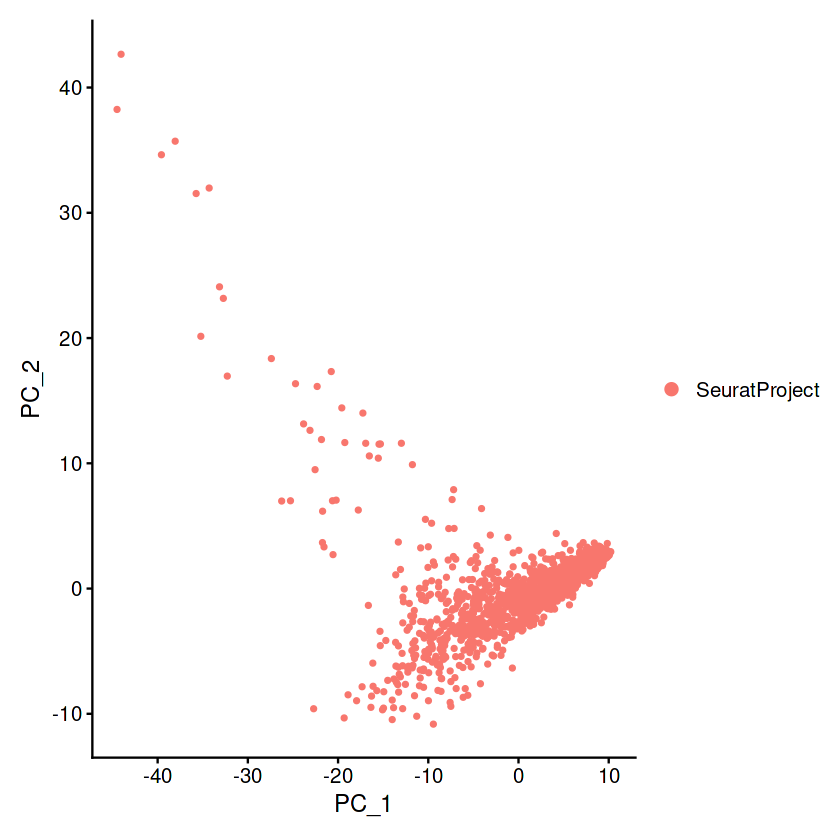

In [112]:
DimPlot(st,
        reduction = "pca")

In [113]:
n.cores=40
splitting = 100
spatial.resolution = 0.3
aa_noise=3
gene_number=2000
graph = 20
seed=123

In [ ]:
multi_SPARKX.SpatialExperiment = function(object, ...) {
  if (!is(object, "SpatialExperiment")) {
    stop("object is not a spatialExperiment object")
  }
  
  data=as.matrix(t(logcounts(object)))
  spatial=as.matrix(spatialCoords(object))
  samples=as.factor(colData(object)$sample_id)
  top=multi_SPARKX(data,spatial,samples)
  return(top)
}

top=multi_SPARKX.SpatialExperiment(spe,n.cores=n.cores)

In [121]:
st1 <- RunKODAMAmatrix(st,
                       FUN = "fastpls",
                       landmarks = 100000,
                       splitting = 300,
                       ncomp=50,
                       n.cores = n.cores
                       )

Calculating Network

Calculating Network spatial
socket cluster with 40 nodes on host ‘localhost’
Finished parallel computation

[1] "Calculation of dissimilarity matrix..."


In [122]:
# Save the Seurat object to an RDS file
saveRDS(st, file = "st.rds")


In [4]:
st<- readRDS("st.rds")

In [5]:
st

An object of class Seurat 
36601 features across 1333 samples within 1 assay 
Active assay: Spatial (36601 features, 2000 variable features)
 3 layers present: counts, data, scale.data
 1 dimensional reduction calculated: pca
 1 spatial field of view present: spatial

In [9]:
str(st)

Formal class 'Seurat' [package "SeuratObject"] with 13 slots
  ..@ assays      :List of 1
  .. ..$ Spatial:Formal class 'Assay5' [package "SeuratObject"] with 8 slots
  .. .. .. ..@ layers    :List of 3
  .. .. .. .. ..$ counts    :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. .. ..@ i       : int [1:1576209] 22 24 29 30 44 48 50 57 60 62 ...
  .. .. .. .. .. .. ..@ p       : int [1:1334] 0 2114 3393 3757 4212 7414 8079 8252 9216 11606 ...
  .. .. .. .. .. .. ..@ Dim     : int [1:2] 36601 1333
  .. .. .. .. .. .. ..@ Dimnames:List of 2
  .. .. .. .. .. .. .. ..$ : NULL
  .. .. .. .. .. .. .. ..$ : NULL
  .. .. .. .. .. .. ..@ x       : num [1:1576209] 1 2 1 1 5 2 1 3 4 2 ...
  .. .. .. .. .. .. ..@ factors : list()
  .. .. .. .. ..$ data      :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. .. ..@ i       : int [1:1576209] 22 24 29 30 44 48 50 57 60 62 ...
  .. .. .. .. .. .. ..@ p       : int [1:1334] 0 2114 3393 3757 4212 7414 807

In [119]:
install.packages('Rnanoflann')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



_________________


In [75]:
library("nnSVG")
library("scater")
library("scran")
library("scry")
library("SPARK")
library("harmony")
library("Seurat")
library("spatialLIBD")
library("KODAMAextra")
library("mclust")
library("slingshot")
library("irlba")